In [1]:
import fastf1 as ff1

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import matplotlib as mpl

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: C:\Users\ribei\AppData\Local\Temp\fastf1.
	Size: 770.58 MB
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '

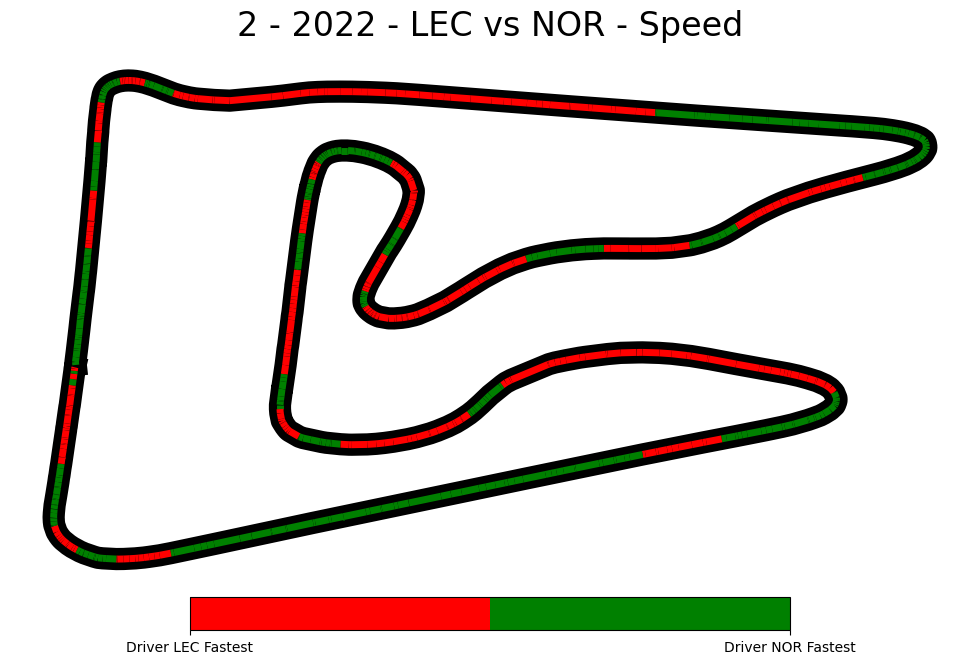

In [2]:
year = 2022
wknd = 1
ses = 'R'
driver1 = 'LEC'
driver2 = 'NOR'
colormap = mpl.cm.plasma

session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()


# Get telemetry data for both drivers
lap_driver1 = session.laps.pick_driver(driver1).pick_fastest()
lap_driver2 = session.laps.pick_driver(driver2).pick_fastest()

# Calculate lap times for both drivers
lap = lap_driver1
lap_time_driver1 = lap_driver1.telemetry['Time'].values
lap_time_driver2 = lap_driver2.telemetry['Time'].values

who_fastest = []

# Jump 10 laps at a time and compare lap times
for i in range(0, len(lap_time_driver1) - 10, 10):
    lap_time_1_chunk = lap_time_driver1[i + 10] - lap_time_driver1[i]
    lap_time_2_chunk = lap_time_driver2[i + 10] - lap_time_driver2[i]
    
    if lap_time_1_chunk < lap_time_2_chunk:
        for j in range(10):
            who_fastest.append(True)
    else:
        for j in range(10):
            who_fastest.append(False)

# Check if there are any remaining laps that are not a multiple of 10
remaining_laps = len(lap_time_driver1) % 10
if remaining_laps > 0:
    # Compare the remaining laps individually
    for i in range(len(lap_time_driver1) - remaining_laps, len(lap_time_driver1)):
        if lap_time_driver1[i] < lap_time_driver2[i]:
            who_fastest.append(True)
        else:
            who_fastest.append(False)

# Get telemetry data
x = lap.telemetry['X']              # values for x-axis
y = lap.telemetry['Y']              # values for y-axis

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# We create a plot with title and adjust some setting to make it look good.
fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
fig.suptitle(f'{weekend.name} - {year} - {driver1} vs {driver2} - Speed', size=24, y=0.97)

# Adjust margins and turn of axis
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
ax.axis('off')

mask = np.array(who_fastest)  # Repeat each element 10 times for each sector

# After this, we plot the data itself.
# Create background track line
ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)
norm = plt.Normalize(0, 1)
# Set the color based on the mask
lc = LineCollection(segments, cmap=mpl.colors.ListedColormap(['red', 'green']), norm=norm, linewidth=5)
lc.set_array(mask)

# Set the values used for colormapping
lc.set_array(mask)

# Merge all line segments together
line = ax.add_collection(lc)


# Finally, we create a color bar as a legend.
# Create a color bar as a legend.
cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
normlegend = mpl.colors.Normalize(vmin=0, vmax=1)  # Assuming 'who_fastest' contains True and False values
legend_labels = [f"Driver {driver1} Fastest", f"Driver {driver2} Fastest"]
legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.colors.ListedColormap(['red', 'green']),
                                   orientation="horizontal", ticks=[0, 1])
legend.set_ticklabels(legend_labels)

plt.show()

In [3]:
# Initialize an empty list to store the years
years = []

# Loop through the range of years from 1950 to 2023 (exclusive)
for year in range(1950, 2024):
    # Append each year to the list
    years.append(year)

# Print the resulting list of years
print(years)

# Create a list of dictionaries with 'label' and 'value'
options = [{'label': str(year), 'value': year} for year in years]

# Print the resulting list of dictionaries
print(options)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
[{'label': '1950', 'value': 1950}, {'label': '1951', 'value': 1951}, {'label': '1952', 'value': 1952}, {'label': '1953', 'value': 1953}, {'label': '1954', 'value': 1954}, {'label': '1955', 'value': 1955}, {'label': '1956', 'value': 1956}, {'label': '1957', 'value': 1957}, {'label': '1958', 'value': 1958}, {'label': '1959', 'value': 1959}, {'label': '1960', 'value': 1960}, {'label': '1961', 'value': 1961}, {'label': '1962', 'value': 1962}, {'label': '1963', 'value': 1963}, {'label': '1964', 'value': 1964}, {'label': '1965', 'value': 1965}, {'label': 

In [4]:
session = ff1.get_event_schedule(2023)['EventName']

tab_countries = [i for i in session]
session

0           Pre-Season Testing
1           Bahrain Grand Prix
2     Saudi Arabian Grand Prix
3        Australian Grand Prix
4        Azerbaijan Grand Prix
5             Miami Grand Prix
6            Monaco Grand Prix
7           Spanish Grand Prix
8          Canadian Grand Prix
9          Austrian Grand Prix
10          British Grand Prix
11        Hungarian Grand Prix
12          Belgian Grand Prix
13            Dutch Grand Prix
14          Italian Grand Prix
15        Singapore Grand Prix
16         Japanese Grand Prix
17            Qatar Grand Prix
18    United States Grand Prix
19      Mexico City Grand Prix
20        São Paulo Grand Prix
21        Las Vegas Grand Prix
22        Abu Dhabi Grand Prix
Name: EventName, dtype: object

In [5]:
from matplotlib import pyplot as plt
import fastf1
import fastf1.plotting

fastf1.plotting.setup_mpl()

session = fastf1.get_session(2023, 'Bahrain', 'R')

session.load()
fast_leclerc = session.laps.pick_driver('LEC').pick_fastest()

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.1.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '14', '55', '44', '18', '63', '77', '10', '23', '22', '2', '20', '21', '27', '24', '4', '31', '16', '81']


In [6]:
session.laps.pick_driver('LEC')

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
228,0 days 01:04:17.172000,LEC,16,0 days 00:01:40.230000,1.0,1.0,0 days 00:25:33.708000,NaT,NaT,0 days 00:00:42.549000,...,True,Ferrari,0 days 01:02:36.652000,2023-03-05 15:03:38.501,2,2.0,False,,False,False
229,0 days 01:05:55.922000,LEC,16,0 days 00:01:38.750000,2.0,1.0,NaT,NaT,0 days 00:00:31.407000,0 days 00:00:43.127000,...,True,Ferrari,0 days 01:04:17.172000,2023-03-05 15:05:19.021,2,2.0,False,,False,True
230,0 days 01:07:34.580000,LEC,16,0 days 00:01:38.658000,3.0,1.0,NaT,NaT,0 days 00:00:31.238000,0 days 00:00:43.103000,...,True,Ferrari,0 days 01:05:55.922000,2023-03-05 15:06:57.771,1,2.0,False,,False,True
231,0 days 01:09:13.405000,LEC,16,0 days 00:01:38.825000,4.0,1.0,NaT,NaT,0 days 00:00:31.402000,0 days 00:00:43.150000,...,True,Ferrari,0 days 01:07:34.580000,2023-03-05 15:08:36.429,1,2.0,False,,False,True
232,0 days 01:10:52.069000,LEC,16,0 days 00:01:38.664000,5.0,1.0,NaT,NaT,0 days 00:00:31.543000,0 days 00:00:42.943000,...,True,Ferrari,0 days 01:09:13.405000,2023-03-05 15:10:15.254,1,2.0,False,,False,True
233,0 days 01:12:30.641000,LEC,16,0 days 00:01:38.572000,6.0,1.0,NaT,NaT,0 days 00:00:31.444000,0 days 00:00:43.037000,...,True,Ferrari,0 days 01:10:52.069000,2023-03-05 15:11:53.918,1,2.0,False,,False,True
234,0 days 01:14:09.332000,LEC,16,0 days 00:01:38.691000,7.0,1.0,NaT,NaT,0 days 00:00:31.441000,0 days 00:00:43.080000,...,True,Ferrari,0 days 01:12:30.641000,2023-03-05 15:13:32.490,1,2.0,False,,False,True
235,0 days 01:15:47.946000,LEC,16,0 days 00:01:38.614000,8.0,1.0,NaT,NaT,0 days 00:00:31.438000,0 days 00:00:42.977000,...,True,Ferrari,0 days 01:14:09.332000,2023-03-05 15:15:11.181,1,2.0,True,TRACK LIMITS AT TURN 4 LAP 8,False,True
236,0 days 01:17:26.774000,LEC,16,0 days 00:01:38.828000,9.0,1.0,NaT,NaT,0 days 00:00:31.503000,0 days 00:00:43.090000,...,True,Ferrari,0 days 01:15:47.946000,2023-03-05 15:16:49.795,1,2.0,False,,False,True
237,0 days 01:19:05.847000,LEC,16,0 days 00:01:39.073000,10.0,1.0,NaT,NaT,0 days 00:00:31.510000,0 days 00:00:43.274000,...,True,Ferrari,0 days 01:17:26.774000,2023-03-05 15:18:28.623,1,2.0,False,,False,True


In [7]:
drivers = [i for i in session.drivers]
drivers

['1',
 '11',
 '14',
 '55',
 '44',
 '18',
 '63',
 '77',
 '10',
 '23',
 '22',
 '2',
 '20',
 '21',
 '27',
 '24',
 '4',
 '31',
 '16',
 '81']

In [8]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import fastf1 as ff1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import matplotlib as mpl
import mpld3
import plotly.graph_objects as go
import dash_ag_grid as dag
import dash
import dash_bootstrap_components as dbc
import matplotlib                                # pip install matplotlib
matplotlib.use('agg')
import base64
from io import BytesIO
import pandas as pd
import plotly.express as px
import dash.exceptions

# Initialize an empty list to store the years
years = []

# Loop through the range of years from 1950 to 2023 (exclusive)
for year in range(1950, 2024):
    # Append each year to the list
    years.append(year)


# Create a list of dictionaries with 'label' and 'value'
_options = [{'label': str(year), 'value': year} for year in years]


app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])
# -----------------------------------------
content = 0
year = 2022
wknd = 1
ses = 'R'
driver1 = 'LEC'
driver2 = 'NOR'
colormap = mpl.cm.plasma

#session = ff1.get_session(year, wknd, ses)
#weekend = session.event
#session.load()
# -----------------------------------------
_options_2 = ["test", ["test2"]]
app.layout = dbc.Container([
    html.H1("Interactive Matplotlib with Dash", className='mb-2', style={'textAlign': 'center'}),
    dbc.Row([
        dbc.Col([ 
            dcc.Dropdown(
                id='category-1',
                options=_options,
                value=_options[0], 
                className='mb-3'
            )
        ]),
        dbc.Col([
            dcc.Dropdown(
                id='category-2',
                options=_options_2,
                value=_options_2[0], 
                className='mb-3'
            )
        ])
    ]),
    dbc.Row([
        dbc.Col([
            html.Img(id='bar-graph-matplotlib')
        ], width=12)
    ]),
])

# Create interactivity between dropdown component and graph
@app.callback(
    Output(component_id='bar-graph-matplotlib', component_property="src"),
    Input('category-2', 'value'),
)
def plot_data(selected_yaxis):
    fig_bar_matplotlib = build_comparaison_tab()
    return fig_bar_matplotlib

def build_comparaison_tab():
    # Get telemetry data for both drivers
    lap_driver1 = session.laps.pick_driver(driver1).pick_fastest()
    lap_driver2 = session.laps.pick_driver(driver2).pick_fastest()

    # Calculate lap times for both drivers
    lap = lap_driver1
    lap_time_driver1 = lap_driver1.telemetry['Time'].values
    lap_time_driver2 = lap_driver2.telemetry['Time'].values

    who_fastest = []

    # Jump 10 laps at a time and compare lap times
    for i in range(0, len(lap_time_driver1) - 10, 10):
        lap_time_1_chunk = lap_time_driver1[i + 10] - lap_time_driver1[i]
        lap_time_2_chunk = lap_time_driver2[i + 10] - lap_time_driver2[i]

        if lap_time_1_chunk < lap_time_2_chunk:
            for j in range(10):
                who_fastest.append(True)
        else:
            for j in range(10):
                who_fastest.append(False)

    # Check if there are any remaining laps that are not a multiple of 10
    remaining_laps = len(lap_time_driver1) % 10
    if remaining_laps > 0:
        # Compare the remaining laps individually
        for i in range(len(lap_time_driver1) - remaining_laps, len(lap_time_driver1)):
            if lap_time_driver1[i] < lap_time_driver2[i]:
                who_fastest.append(True)
            else:
                who_fastest.append(False)

    # Get telemetry data
    x = lap.telemetry['X']  # values for x-axis
    y = lap.telemetry['Y']  # values for y-axis

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    # We create a plot with title and adjust some setting to make it look good.
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))
    fig.suptitle(f'{weekend.name} - {year} - {driver1} vs {driver2} - Speed', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')

    mask = np.array(who_fastest)  # Repeat each element 10 times for each sector

    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap.telemetry['X'], lap.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)
    norm = plt.Normalize(0, 1)
    # Set the color based on the mask
    lc = LineCollection(segments, cmap=mpl.colors.ListedColormap(['red', 'green']), norm=norm, linewidth=5)
    lc.set_array(mask)

    # Set the values used for colormapping
    lc.set_array(mask)

    # Merge all line segments together
    line = ax.add_collection(lc)

    # Finally, we create a color bar as a legend.
    # Create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=0, vmax=1)  # Assuming 'who_fastest' contains True and False values
    legend_labels = [f"Driver {driver1} Fastest", f"Driver {driver2} Fastest"]
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=mpl.colors.ListedColormap(['red', 'green']),
                                       orientation="horizontal", ticks=[0, 1])
    legend.set_ticklabels(legend_labels)

    # Save it to a temporary buffer.
    buf = BytesIO()
    fig.savefig(buf, format="png")
    # Embed the result in the html output.
    fig_data = base64.b64encode(buf.getbuffer()).decode("ascii")
    fig_bar_matplotlib = f'data:image/png;base64,{fig_data}'

    return fig_bar_matplotlib

if __name__ == "__main__":
    app.run_server(port=8080)

In [3]:
import time
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
from dash.exceptions import PreventUpdate

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout =  dbc.Container([
    
    html.H1("Comparaison", className='mb-2', style={'textAlign': 'center'}),
    
    dbc.Row([
        dbc.Col([
            dcc.Dropdown(
            id='dropdown-1',
            options=[
                {'label': str(year), 'value': year} for year in range(2000, 2031)
            ],
            value=None,
            className='mb-3'
            )
        ]),
        dbc.Col([
            dcc.Loading(
                id='loading-dropdown-2',
                type='default',
                children=[dcc.Dropdown(id='dropdown-2', className='mb-3')]
            )
        ])
    ]),
    dbc.Row([
        dbc.Col([
            dcc.Loading(
                id='loading-dropdown-3',
                type='default',
                children=[dcc.Dropdown(id='dropdown-3', className='mb-3')]
            ),
        ]),
        dbc.Col([
            dcc.Loading(
                id='loading-dropdown-4',
                type='default',
                children=[dcc.Dropdown(id='dropdown-4', className='mb-3')]
            )
        ])
    ])
])

def time_consuming_function(selected_year, selected_month):
    # Simulate a time-consuming operation
    time.sleep(3)
    return [{'label': f'Day {day}', 'value': day} for day in range(1, 32)]

@app.callback(
    Output('loading-dropdown-2', 'children'),
    Output('dropdown-2', 'options'),
    Output('dropdown-2', 'value'),
    Input('dropdown-1', 'value')
)
def update_dropdown_2(selected_year):
    if selected_year is None:
        raise PreventUpdate
    options = [{'label': f'Month {month}', 'value': month} for month in range(1, 13)]
    return [dcc.Dropdown(id='dropdown-2', options=options, className='mb-3')], options, options[0]['value']

@app.callback(
    Output('loading-dropdown-3', 'children'),
    Output('dropdown-3', 'options'),
    Output('dropdown-3', 'value'),
    Input('dropdown-1', 'value'),
    Input('dropdown-2', 'value')
)
def update_dropdown_3(selected_year, selected_month):
    if selected_month is None:
        raise PreventUpdate
    options = time_consuming_function(selected_year, selected_month)
    return [dcc.Dropdown(id='dropdown-3', options=options, className='mb-3')], options, options[0]['value']

@app.callback(
    Output('loading-dropdown-4', 'children'),
    Output('dropdown-4', 'options'),
    Output('dropdown-4', 'value'),
    Input('dropdown-1', 'value'),
    Input('dropdown-2', 'value'),
    Input('dropdown-3', 'value')
)
def update_dropdown_4(selected_year, selected_month, selected_day):
    if selected_day is None:
        raise PreventUpdate
    options = [{'label': f'Option {option}', 'value': option} for option in range(1, 6)]
    return [dcc.Dropdown(id='dropdown-4', options=options, className='mb-3')], options, options[0]['value']

if __name__ == '__main__':
    app.run_server(debug=True)
